This file draws from public census data and the 2017 medicare Hospital Compare dataset to examine trends in hospital patient outcomes as a function of income in the county in which the hospital is located.

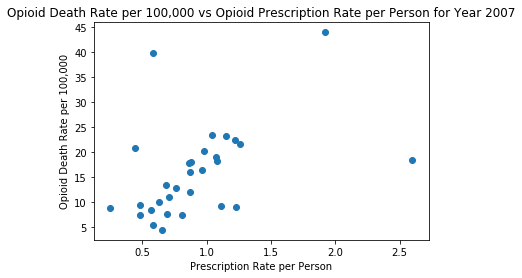

r-squared is: 0.195611453993


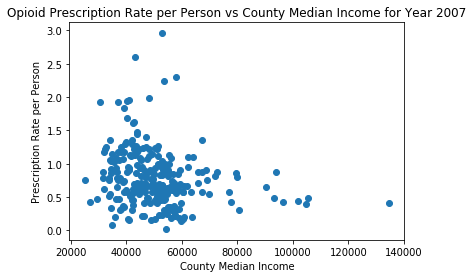

r-squared is: 0.0457730888353


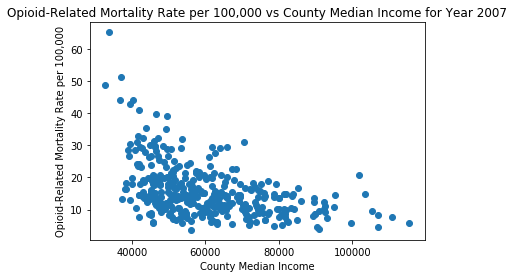

r-squared is: 0.210907321555
Mean death rate per 100,000 is: 15.746997389


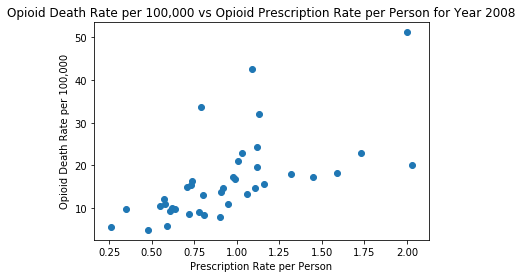

r-squared is: 0.39107576566


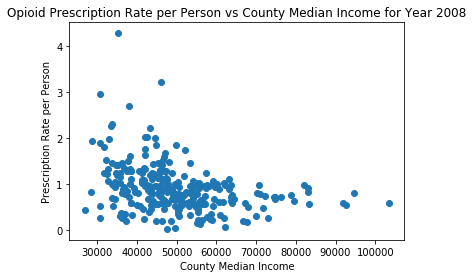

r-squared is: 0.103187850278


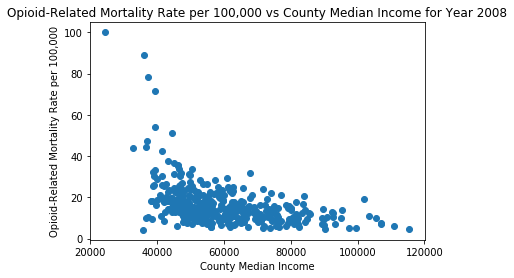

r-squared is: 0.201253444693
Mean death rate per 100,000 is: 16.3203084833


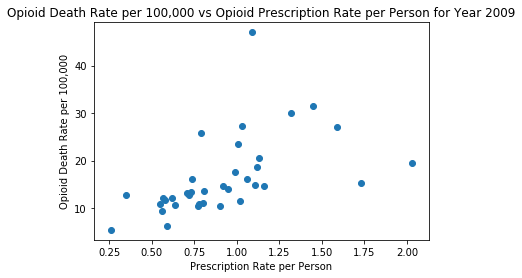

r-squared is: 0.283889270454


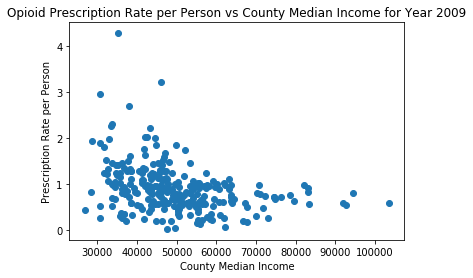

r-squared is: 0.103187850278


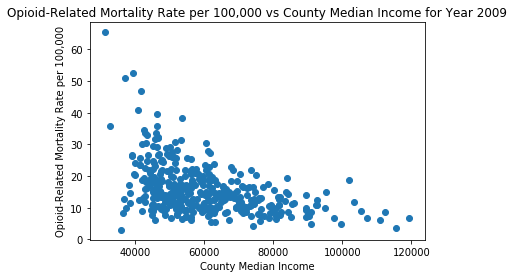

r-squared is: 0.208420904438
Mean death rate per 100,000 is: 15.9115979381


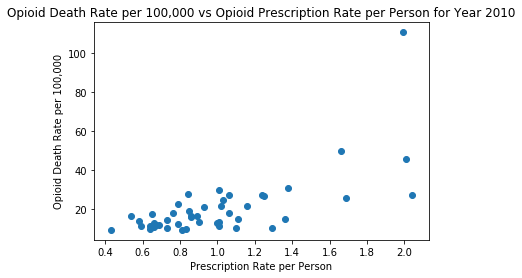

r-squared is: 0.45997820531


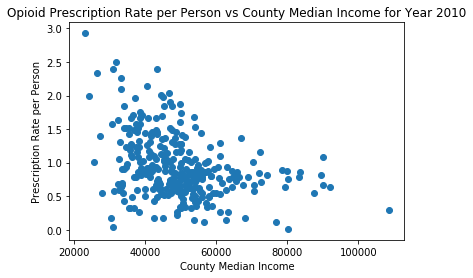

r-squared is: 0.12892427468


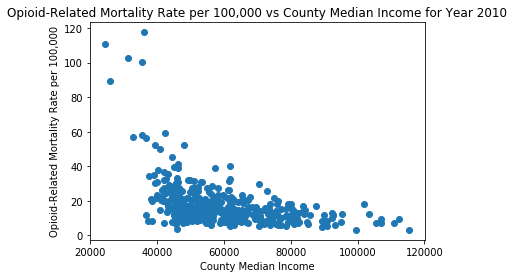

r-squared is: 0.211082354155
Mean death rate per 100,000 is: 17.6183333333


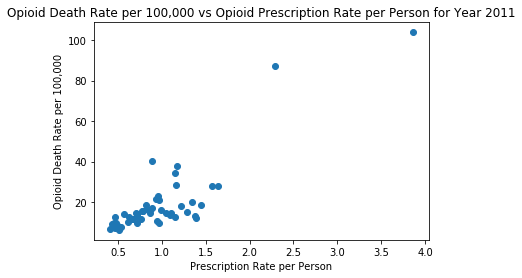

r-squared is: 0.740404778558


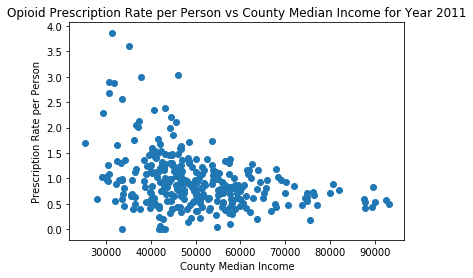

r-squared is: 0.121468735477


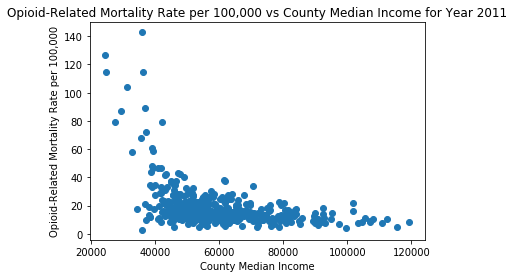

r-squared is: 0.190822620132
Mean death rate per 100,000 is: 19.0288248337


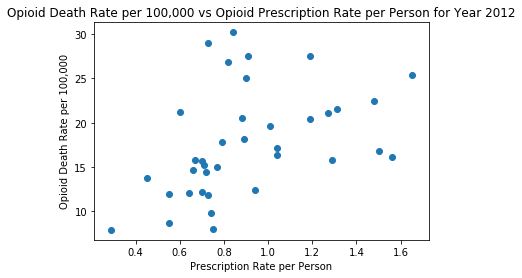

r-squared is: 0.18468504748


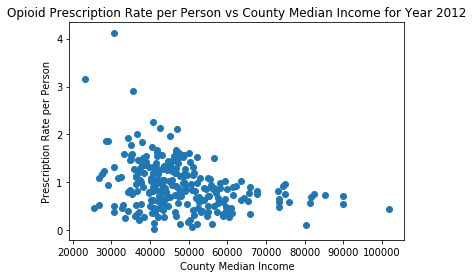

r-squared is: 0.108711877724


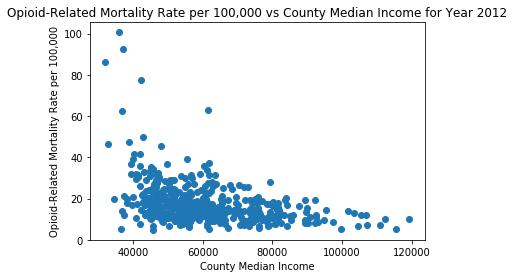

r-squared is: 0.149666794314
Mean death rate per 100,000 is: 17.868707483


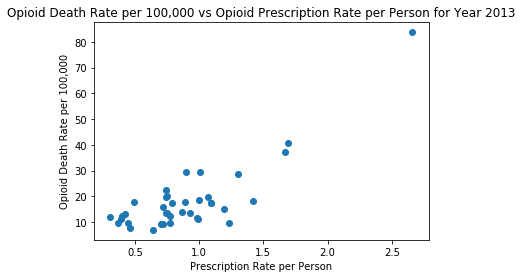

r-squared is: 0.688970174551


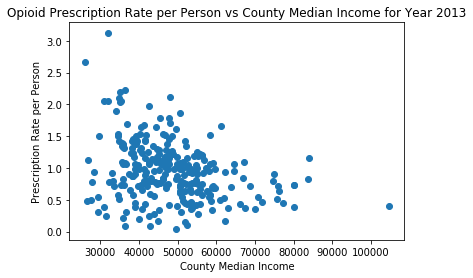

r-squared is: 0.10000815616


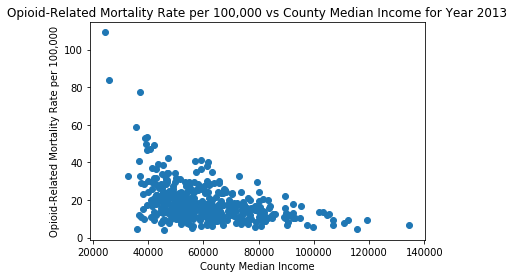

r-squared is: 0.168039484736
Mean death rate per 100,000 is: 18.5069414317


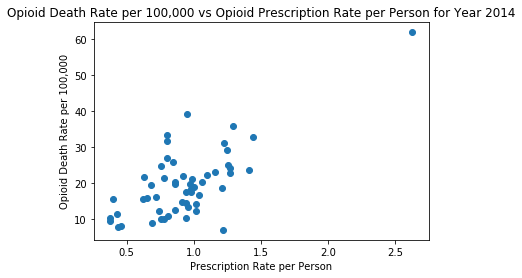

r-squared is: 0.492826330377


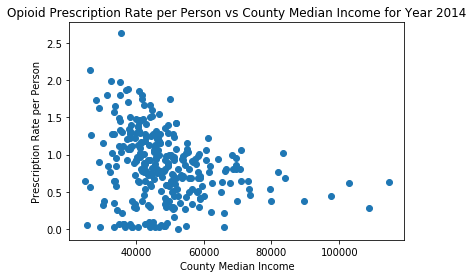

r-squared is: 0.0672057574617


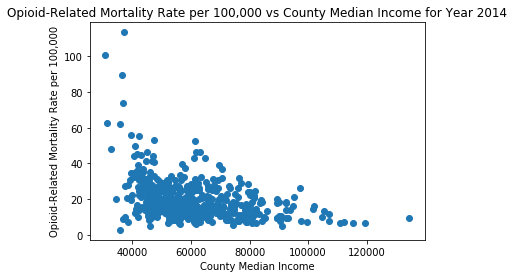

r-squared is: 0.144759613401
Mean death rate per 100,000 is: 20.0980353635


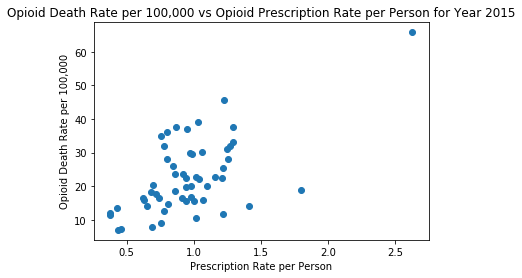

r-squared is: 0.378973682526


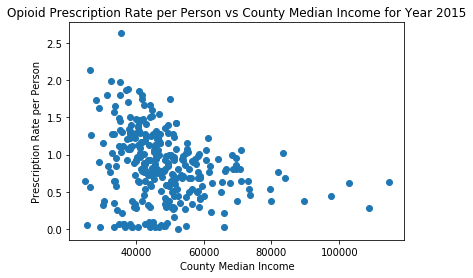

r-squared is: 0.0672057574617


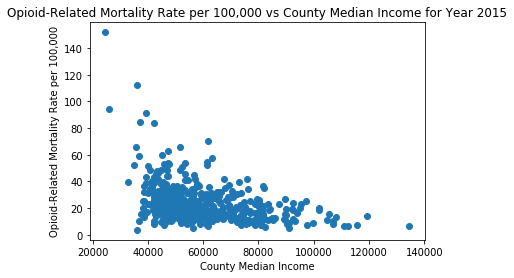

r-squared is: 0.138472610228
Mean death rate per 100,000 is: 22.9639622642


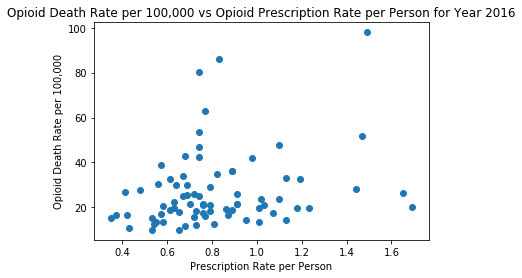

r-squared is: 0.0665538616503


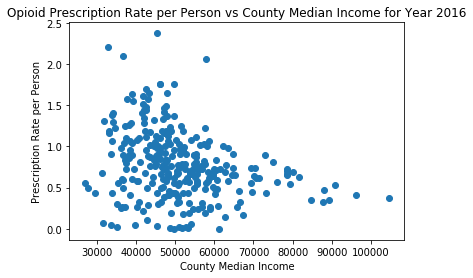

r-squared is: 0.0759900049554


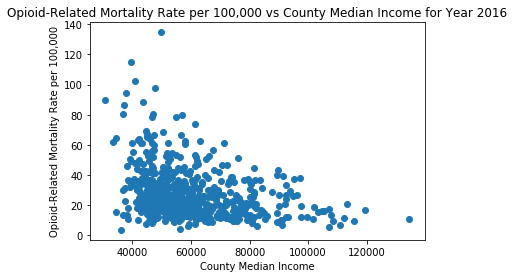

r-squared is: 0.10583217685
Mean death rate per 100,000 is: 28.0383419689


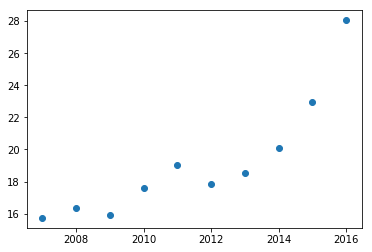

In [58]:
#Pull data from:
#https://wonder.cdc.gov/controller/datarequest/D76;jsessionid=E1C9E5C61A4F4F9794D48F66D9B3C34F
#Used reference codes from:
#https://www.cdc.gov/drugoverdose/data/statedeaths.html

#Opioid prescription rates found from https://www.cdc.gov/drugoverdose/maps/rxrate-maps.html


#Import relevant libraries
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


#Laptop Directory
os.chdir(r"C:\Users\Paul\Desktop\Data_Incubator April 2018\Project")

#Desktop Directory
#os.chdir(r"C:\Users\Paul\Desktop\Insight Health Data\Working_Directory")

#Grab median salary data
incomes={}
all_incomes_list = []

#Use county level census data drawn from the following source (4/25/18):
#'Unemployment and median household income for the U.S., States, and counties, 2007-16', last updated 1/25/18
#https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/

#Open census data to grab median incomes for each county in the USA
with open('Unemployment.csv') as file:
    reader = csv.reader(file)
    
    #Skip headers
    for i in range(8):
        next(reader)
        
    #Read in salary data (col 46 w/ Python indexing) and store it in a dictionary using the county code as the key
    for row in reader:
        if(len(row[46].strip())>0):
            identifier = row[0].strip()
        #Check for entries where income information is not available (seems to be an issue with US territories) and disregard them
        if(len(row[46].strip())>0):
            amount = int(row[46].replace(',',''))
            incomes.setdefault(identifier,amount)


mean_years = []
#Data on number of opioid prescriptions by county
opioid_rx = ['2007OpioidPrescriptions.csv','2008OpioidPrescriptions.csv','2009OpioidPrescriptions.csv','2010OpioidPrescriptions.csv','2011OpioidPrescriptions.csv','2012OpioidPrescriptions.csv','2013OpioidPrescriptions.csv','2014OpioidPrescriptions.csv','2015OpioidPrescriptions.csv','2016OpioidPrescriptions.csv']

#Data for opioid deaths (IDC-10 codes X40-X44, X60-X64, X85, and Y10-Y14, taken from CDC classifiers for opioid-related deaths)
input_years = ['2007Data.csv','2008Data.csv','2009Data.csv','2010Data.csv','2011Data.csv','2012Data.csv','2013Data.csv','2014Data.csv','2015Data.csv','2016Data.csv']

#Read in each year of data one by one
for index in range(len(input_years)):
    current_year = input_years[index][:4]
    county_population = {}
    opioid_death = {}
    value_catalog = []
    opioid_prescriptions = {}
    with open(input_years[index]) as file:
        reader = csv.reader(file)
        next(reader)
        for row in reader:
            if(len(row[1].strip())>0):
                put_rate = row[6].strip()
                if(str.isdigit(put_rate.replace('.',''))):
                    code = row[2].strip()
                    if(len(code)==4):
                        code = '0'+code
                    opioid_death[code]=float(put_rate)
                    value_catalog.append(float(put_rate))
                    county_population[code]=int(row[4].strip())

    with open(opioid_rx[index]) as file:
        reader = csv.reader(file)
        #Skip header
        next(reader)
        for row in (reader):
            reported_val = row[3].strip()
            if(str.isdigit(reported_val.replace('.',''))):
                item_added+=1
            if(str.isdigit(row[3])):
                rate_per_100 = float(row[3].strip())
                code = row[2].strip()
                if(len(code)==4):
                    code = '0'+code
                opioid_prescriptions[code]=rate_per_100/100

    x_axis_prescrip = []
    y_axis_death = []
    for item in opioid_death:
        if item in opioid_prescriptions:
            x_axis_prescrip.append(opioid_prescriptions[item])
            y_axis_death.append(opioid_death[item])
    plt.title('Opioid Death Rate per 100,000 vs Opioid Prescription Rate per Person for Year ' + str(current_year))
    plt.xlabel('Prescription Rate per Person')
    plt.ylabel('Opioid Death Rate per 100,000')
    a = np.array(x_axis_prescrip)
    b = np.array(y_axis_death)
    plt.scatter(a,b)
    plt.show()
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(a,b)
    predicted = slope*money+intercept
    residuals = mortality - predicted
    print('r-squared is: ' + str(r_value*r_value))

    
    c=[]
    d=[]
    for item in incomes:
        if(item in opioid_prescriptions):
            c.append(incomes[item])
            d.append(opioid_prescriptions[item])
    c_val = np.array(c)
    d_val = np.array(d)
    plt.figure()
    plt.title('Opioid Prescription Rate per Person vs County Median Income for Year ' + str(current_year))
    plt.xlabel('County Median Income')
    plt.ylabel('Prescription Rate per Person')  
    plt.scatter(c_val,d_val)
    plt.show()
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(c_val,d_val)
    predicted = slope*money+intercept
    residuals = mortality - predicted
    print('r-squared is: ' + str(r_value*r_value))

    
    x_val = []
    y_val = []
    missed_count = []
    for item in opioid_death:
        if(item in incomes):
            x_val.append(incomes[item])
            y_val.append(opioid_death[item])

        else:
            missed_count.append(item)

    #print(len(missed_count))

    money = np.array(x_val)
    mortality = np.array(y_val)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(money,mortality)
    predicted = slope*money+intercept
    residuals = mortality - predicted
    plt.figure()
    plt.title('Opioid-Related Mortality Rate per 100,000 vs County Median Income for Year ' + str(current_year))
    plt.xlabel('County Median Income')
    plt.ylabel('Opioid-Related Mortality Rate per 100,000')  
    plt.scatter(money,mortality)
    plt.show()
    print('r-squared is: ' + str(r_value*r_value))
    
    final_vals = np.array(value_catalog)
    print('Mean death rate per 100,000 is: ' + str(np.mean(final_vals)))
    mean_years.append(float(np.mean(final_vals)))

x_axis = list(x for x in range(2007,2017))
plt.figure()
plt.scatter(x_axis,mean_years)
plt.show()

In [11]:
temp = list(x for x in range(2007,2017))
print(temp)

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
